In [1]:
pip install scikit-image 

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
from skimage.feature import local_binary_pattern
from sklearn.neighbors import KNeighborsClassifier
from PIL import Image
import cv2
import numpy as np 
import os 
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

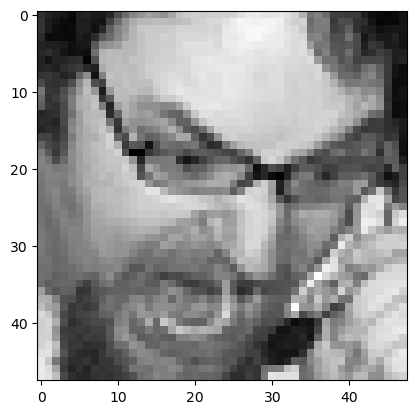

In [2]:
chemin_image = "/home/louis/facial_emotions/dataset/test/angry/PrivateTest_10131363.jpg"  # Remplace "nom_image.jpg" par le nom de ton fichier

# Charger l'image
image = cv2.imread(chemin_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = np.array(image)

plt.imshow(image, cmap='gray')

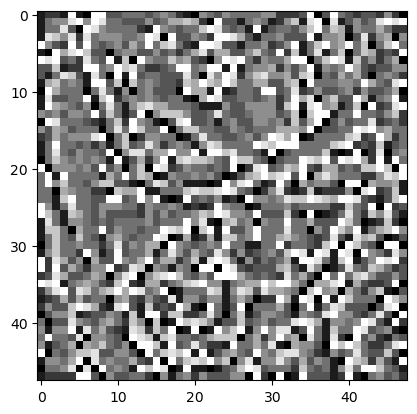

In [3]:
lbp_image = local_binary_pattern(image, P=8, R=1, method="uniform")

plt.imshow(lbp_image, cmap='gray')

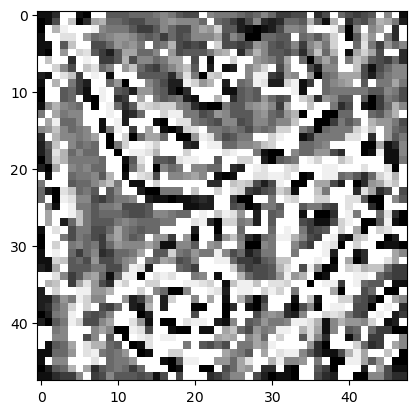

In [4]:
lbp_image = local_binary_pattern(image, P=16, R=2, method="uniform")
plt.imshow(lbp_image, cmap='gray')
lbp_hist = np.histogram(lbp_image,256)

In [5]:
def lbp(image, block_size, radius): 
    height, width = image.shape
    if height % block_size != 0 or width% block_size :
        print("make sur block is a divider of image size")
        return 0
    
    num_it = int(height/block_size)
    n_points = 8 * radius
    
    lbp_patches = []
    
    for i in range(0, num_it): 
        for j in range(0, num_it): 
            i_index = i*block_size
            j_index = j*block_size 
            patch = image[i_index:i_index+ block_size, j_index:j_index+ block_size]
            lbp_patch = local_binary_pattern(patch, R=radius, P=n_points)
            lbp_patch.ravel()
            lbp_hist = np.histogram(lbp_patch, 256)
            lbp_patches.extend(lbp_hist[0])
    return lbp_patches

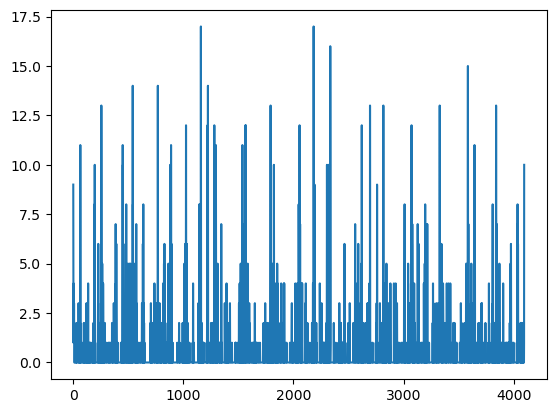

In [6]:
lbp_hist = lbp(image, 12, 1)
plt.plot(lbp_hist)
plt.show()

In [7]:
# Chargement des images et extraction des LBP
def load_dataset(path, block_size=12, radius=1):
    data = []
    labels = []
    emotions = os.listdir(path)
    for emotion in emotions:
        emotion_path = os.path.join(path, emotion)
        for img_name in os.listdir(emotion_path):
            img_path = os.path.join(emotion_path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is not None:
                lbp_features = np.array(lbp(image, block_size, radius))
                data.append(lbp_features)
                labels.append(emotion)
    return np.array(data), np.array(labels)

Classification Report:
              precision    recall  f1-score   support

       angry       0.35      0.40      0.37       958
     disgust       0.42      0.38      0.40       111
        fear       0.35      0.33      0.34      1024
       happy       0.50      0.71      0.59      1774
     neutral       0.39      0.38      0.39      1233
         sad       0.48      0.21      0.29      1247
    surprise       0.55      0.49      0.52       831

    accuracy                           0.44      7178
   macro avg       0.43      0.42      0.41      7178
weighted avg       0.44      0.44      0.43      7178

Accuracy: 0.44148787963220953


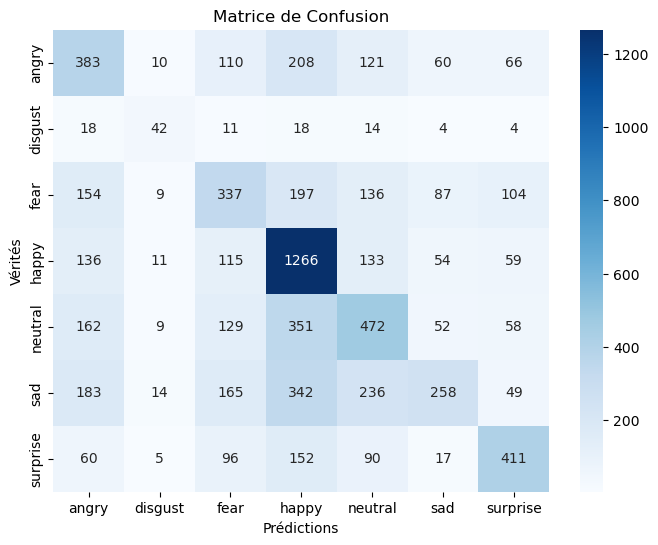

In [8]:
# Charger les données
train_path = "/home/louis/facial_emotions/dataset/train"
test_path = "/home/louis/facial_emotions/dataset/test"

X_train, y_train = load_dataset(train_path)
X_test, y_test = load_dataset(test_path)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un KNN
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')  # k = 7
knn.fit(X_train, y_train)

# Prédictions
y_pred = knn.predict(X_test)

# Évaluer le modèle
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Matrice de Confusion
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()